# importing required liaberaries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,accuracy_score,classification_report,roc_curve,auc


# Loading dataset

In [93]:
data = pd.read_csv(r"C:\Users\acer\Desktop\Evaluation project\avocado.csv")
data                 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# checking Total no. of rows and columns

In [94]:
data.shape

(16468, 14)

Findings from above observation, total number of rows = 16468 and columns=14

# Checking missing value

In [95]:
data.isnull().sum()/len(data)*100

Unnamed: 0      90.788195
Date            90.788195
AveragePrice    90.788195
Total Volume    90.788195
4046            90.788195
4225            90.788195
4770            90.788195
Total Bags      90.788195
Small Bags      90.788195
Large Bags      90.788195
XLarge Bags     90.788195
type            90.788195
year            90.788195
region          90.788195
dtype: float64

Findings from above observation,all columns have approx 91% missing values. 

# Checking data types

In [96]:
data.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

Findings from above observation:

1)All columns in dataset has float and object data types.

2) Date column need to change from object data type to Daetime datatype.

# Date column need to change from object data type to Daetime datatype.

In [97]:
data['Date']=pd.to_datetime(data['Date'])

In [98]:
data.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

Findings from above observation:
    
Data type of Date column has been successfully changed.    

In [99]:
# Creating new column "Month"

In [100]:
data['Month']=data['Date'].dt.month

In [101]:
# Creating New column "day"

In [102]:
data['Day']=data['Date'].dt.day

In [103]:
# dropping Date column
data= data.drop('Date',axis=1)

# filling missing values

In [104]:
#Dropping useless column
data = data.drop('Unnamed: 0',axis=1)

In [105]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


In [106]:
data['AveragePrice']=data['AveragePrice'].fillna(data['AveragePrice'].mean())

In [107]:
data['Total Volume']=data['Total Volume'].fillna(data['Total Volume'].median())

In [108]:
data['4046']=data['4046'].fillna(data['4046'].median())

In [109]:
data['4225']=data['4225'].fillna(data['4225'].median())

In [110]:
data['4770']=data['4770'].fillna(data['4770'].median())

In [111]:
data['Total Bags']=data['Total Bags'].fillna(data['Total Bags'].median())

In [112]:
data['Small Bags']=data['Small Bags'].fillna(data['Small Bags'].median())

In [113]:
data['Large Bags']=data['Large Bags'].fillna(data['Large Bags'].mean())

In [114]:
data['XLarge Bags']=data['XLarge Bags'].fillna(data['XLarge Bags'].median())

In [115]:
data['year']=data['year'].fillna(data['year'].mean())

In [116]:
data['Month']=data['Month'].fillna(data['Month'].mean())

In [117]:
data['Day']=data['Day'].fillna(data['Day'].mean())

In [118]:
data['type'].mode()

0    conventional
dtype: object

In [119]:
data['type']=data['type'].fillna('conventional')

In [120]:
data['region'].mode()

0    California
dtype: object

In [121]:
data['region']=data['region'].fillna('California')

# Checking df dataframe after filling missing values

In [122]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33000,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.250000,0.0,conventional,2015.000000,Albany,12.000000,27.00000
1,1.35000,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.490000,0.0,conventional,2015.000000,Albany,12.000000,20.00000
2,0.93000,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.140000,0.0,conventional,2015.000000,Albany,12.000000,13.00000
3,1.08000,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.760000,0.0,conventional,2015.000000,Albany,6.000000,12.00000
4,1.28000,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.690000,0.0,conventional,2015.000000,Albany,11.000000,29.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,1.07499,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,42642.049374,0.0,conventional,2015.162821,California,6.362558,15.25379
16464,1.07499,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,42642.049374,0.0,conventional,2015.162821,California,6.362558,15.25379
16465,1.07499,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,42642.049374,0.0,conventional,2015.162821,California,6.362558,15.25379
16466,1.07499,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,42642.049374,0.0,conventional,2015.162821,California,6.362558,15.25379


In [123]:
data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

Findings from above observation, There are no missing values present in our dataset    

# EDA

<AxesSubplot:xlabel='Day', ylabel='AveragePrice'>

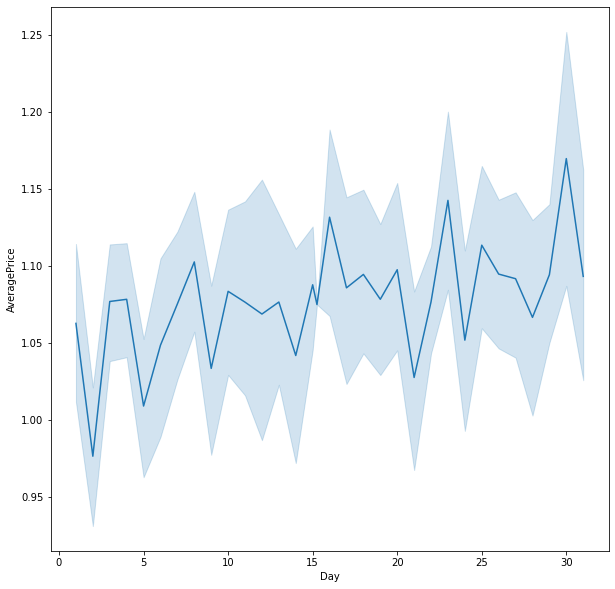

In [256]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Day',y='AveragePrice',data=data)

As per day wise observation,average price per day implies that the price fluctuates in a similar manner at a regular interval.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

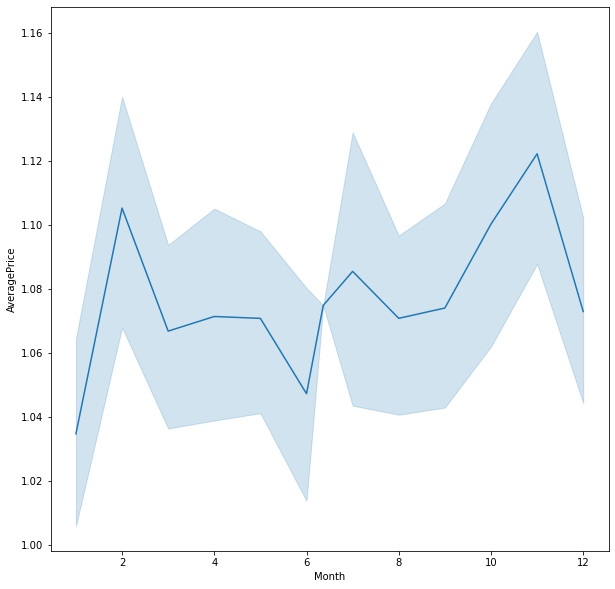

In [257]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Month',y='AveragePrice',data=data)

As per above observation, the Average Price of Avocado are in pick during January and december time and down during June.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

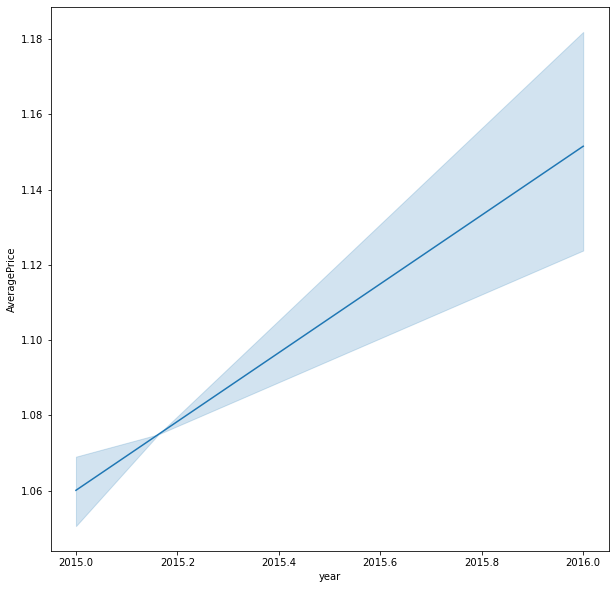

In [260]:
plt.figure(figsize=(10,10))
sns.lineplot(x='year',y='AveragePrice',data=data)

As per above observation, Average Price of avacado are increasing every year.

<AxesSubplot:xlabel='region'>

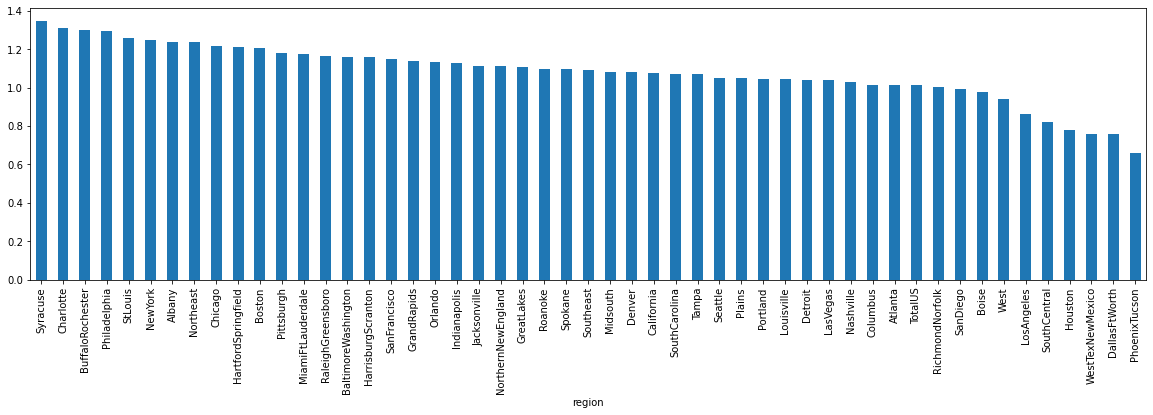

In [270]:
plt.figure(figsize=(20,5))
data.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).plot(kind='bar')

The barplot shows the average price of avocado at various regions in a ascending order. Clearly Syracuse, Charlotte, BuffaloRochester are the regions with the highest avocado prices.

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

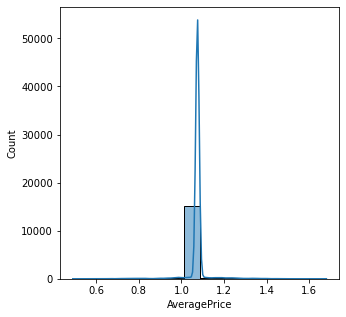

In [275]:
plt.figure(figsize=(5,5))
sns.histplot(data=data, x="AveragePrice",kde=True)

As per above observation, average price of avocado suggests that its distribution is not skewed.

# Checking correlation

In [124]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.136023,-0.183228,-0.088656,-0.096444,-0.107570,-0.094200,-0.177480,-0.046509,0.178683,0.060642,0.092589
Total Volume,-0.136023,1.000000,0.986380,0.987795,0.938419,0.969694,0.963127,0.881406,0.553694,-0.004056,-0.053464,-0.033753
4046,-0.183228,0.986380,1.000000,0.955404,0.906086,0.935331,0.927755,0.852283,0.511700,-0.038978,-0.051092,-0.030657
4225,-0.088656,0.987795,0.955404,1.000000,0.933205,0.955240,0.947978,0.866974,0.540686,-0.006984,-0.056254,-0.042370
4770,-0.096444,0.938419,0.906086,0.933205,1.000000,0.931809,0.929160,0.806064,0.672926,0.028024,-0.052821,-0.020444
Total Bags,-0.107570,0.969694,0.935331,0.955240,0.931809,1.000000,0.997527,0.878452,0.630329,0.086857,-0.046024,-0.020374
Small Bags,-0.094200,0.963127,0.927755,0.947978,0.929160,0.997527,1.000000,0.847794,0.638928,0.102590,-0.047232,-0.015875
Large Bags,-0.177480,0.881406,0.852283,0.866974,0.806064,0.878452,0.847794,1.000000,0.431316,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.046509,0.553694,0.511700,0.540686,0.672926,0.630329,0.638928,0.431316,1.000000,0.210314,0.020663,0.018605
year,0.178683,-0.004056,-0.038978,-0.006984,0.028024,0.086857,0.102590,-0.018678,0.210314,1.000000,-0.013144,0.029744


# Checking correlation using heatmap

<AxesSubplot:>

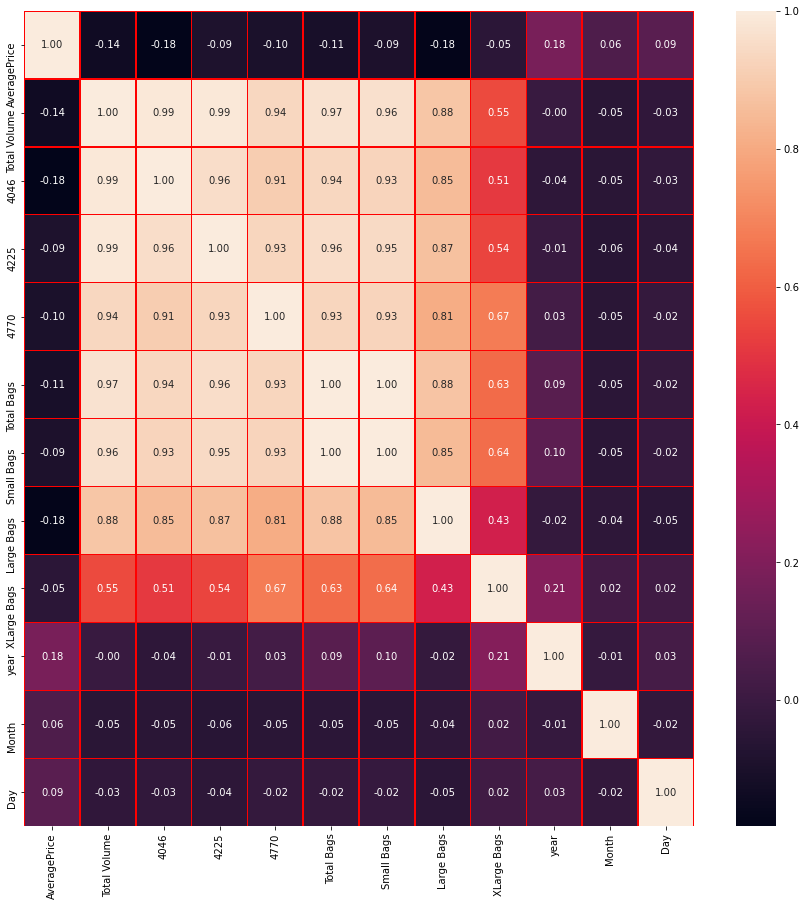

In [125]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor='r',fmt='.2f')

Findings from above observation:
    
1)Total Volume has 14% negetive correlation with Target column.

2)4046 has 18% negetive correlation with Target column.

3)4225 has 9% negetive correlation with Target column.

4)4770 has 10% negetive correlation with Target column.

5)Total Bags has 11% negetive correlation with Target column.

6)Small Bags has 9% negetive correlation with Target column.

7)Large Bags has 17% negetive correlation with Target column.

8)XLarge Bags has 5% negetive correlation with Target column.

9)year  has 18% positive correlation with Target column.

10)Month has 6% positive correlation with Target column.

11)Day has 9% positive correlation with Target column.


Maximum correlation with Target column === 4046 has 18% negetive correlation,year  has 18% positive correlation

Minimum correlation with Target column === XLarge Bags has 5% negetive correlation

# Checking Outlier

<AxesSubplot:>

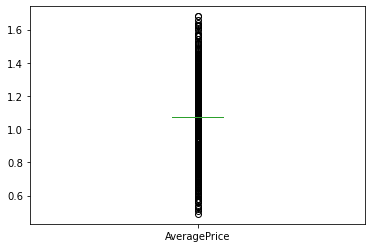

In [158]:
data['AveragePrice'].plot.box()

As per above observation, AveragePrice column has an outlier

<AxesSubplot:>

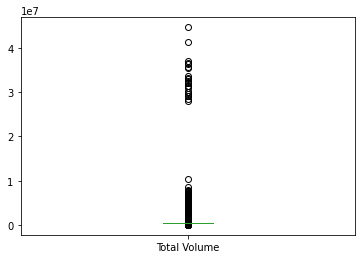

In [159]:
data['Total Volume'].plot.box()

As per above observation, Total Volume column has an outlier

<AxesSubplot:>

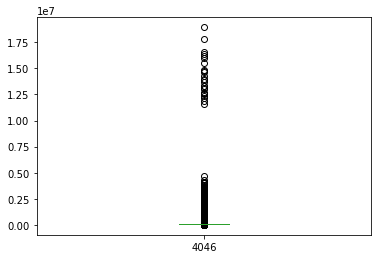

In [160]:
data['4046'].plot.box()

As per above observation, 4046 column has an outlier

<AxesSubplot:>

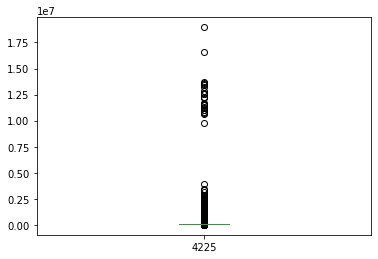

In [161]:
data['4225'].plot.box()

As per above observation, 4225 column has an outlier

<AxesSubplot:>

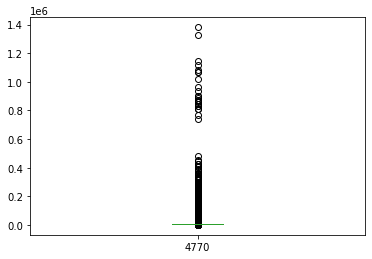

In [162]:
data['4770'].plot.box()

As per above observation, 4770 column has an outlier

<AxesSubplot:>

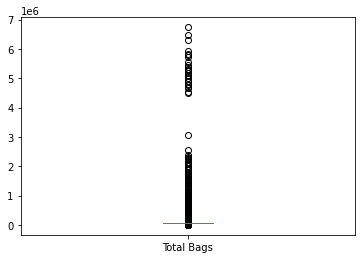

In [163]:
data['Total Bags'].plot.box()

As per above observation, Total Bags column has an outlier

<AxesSubplot:>

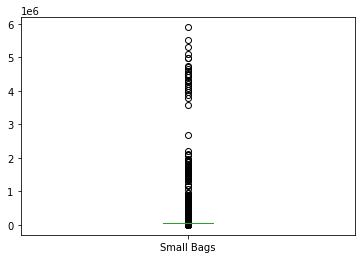

In [164]:
data['Small Bags'].plot.box()

As per above observation, Small Bags column has an outlier

<AxesSubplot:>

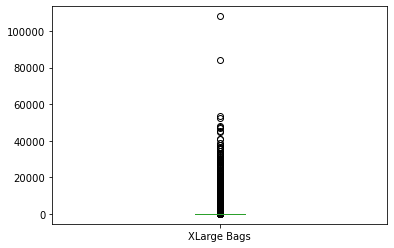

In [165]:
data['XLarge Bags'].plot.box()

As per above observation, XLarge Bags column has an outlier

<AxesSubplot:>

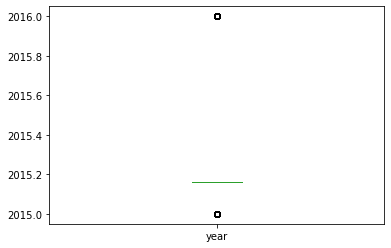

In [166]:
data['year'].plot.box()

As per above observation, year column has an outlier

<AxesSubplot:>

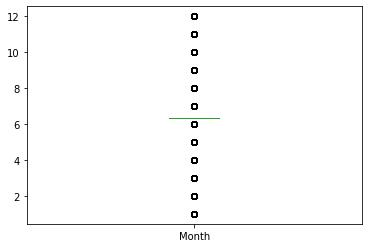

In [167]:
data['Month'].plot.box()

As per above observation, Month column has an outlier

<AxesSubplot:>

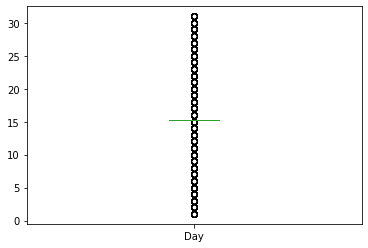

In [168]:
data['Day'].plot.box()

As per above observation, Day column has an outlier

# Checking Skewness

In [169]:
data.skew()

AveragePrice    -0.360270
Total Volume    20.780598
4046            20.223665
4225            21.202221
4770            18.212142
Total Bags      18.204036
Small Bags      18.179783
Large Bags      16.934805
XLarge Bags     19.392479
year             6.018559
Month            0.333921
Day              0.135962
dtype: float64

Findings the skewed columns from the above observation are mentioned below:
    
    
Total Volume===    20.780598


4046===            20.223665


4225===            21.202221


4770===            18.212142


Total Bags===     18.204036


Small Bags===      18.179783


Large Bags===      17.413970


XLarge Bags===     19.392479


year===             6.018559


  

# Checking Normal distribution

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

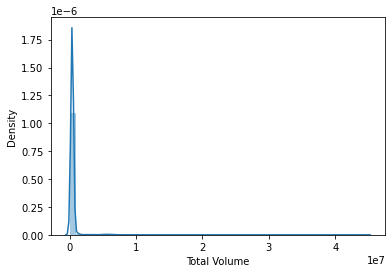

In [170]:
sns.distplot(data['Total Volume'])

In [255]:
data['Total Volume'].describe()

count    1.646800e+04
mean     5.132494e+05
std      1.389080e+06
min      3.875074e+04
25%      4.027919e+05
50%      4.027919e+05
75%      4.027919e+05
max      4.465546e+07
Name: Total Volume, dtype: float64

As per above observation, Total Volume column is not normally distributed

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4046', ylabel='Density'>

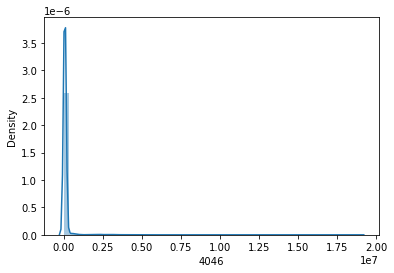

In [171]:
sns.distplot(data['4046'])

In [254]:
data['4046'].describe()

count    1.646800e+04
mean     1.337691e+05
std      6.130926e+05
min      4.677200e+02
25%      8.175117e+04
50%      8.175117e+04
75%      8.175117e+04
max      1.893304e+07
Name: 4046, dtype: float64

As per above observation, 4046 column is not normally distributed

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4225', ylabel='Density'>

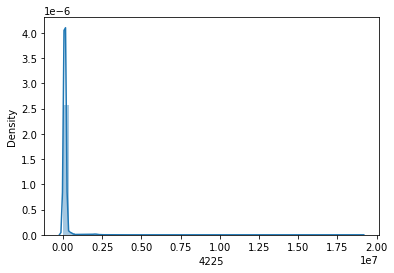

In [172]:
sns.distplot(data['4225'])

In [253]:
data['4225'].describe()

count    1.646800e+04
mean     1.640581e+05
std      5.272171e+05
min      1.783770e+03
25%      1.186649e+05
50%      1.186649e+05
75%      1.186649e+05
max      1.895648e+07
Name: 4225, dtype: float64

As per above observation, 4225 column is almost normally distributed

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4770', ylabel='Density'>

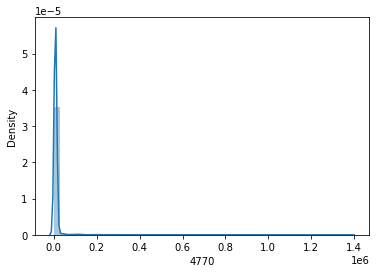

In [173]:
sns.distplot(data['4770'])

In [252]:
data['4770'].describe()

count    1.646800e+04
mean     1.162321e+04
std      4.359256e+04
min      0.000000e+00
25%      7.688170e+03
50%      7.688170e+03
75%      7.688170e+03
max      1.381516e+06
Name: 4770, dtype: float64

As per above observation, 4770 column is not normally distributed

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

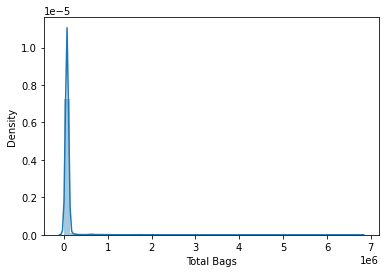

In [174]:
sns.distplot(data['Total Bags'])

In [251]:
data['Total Bags'].describe()

count    1.646800e+04
mean     9.420987e+04
std      2.385933e+05
min      3.311770e+03
25%      7.397906e+04
50%      7.397906e+04
75%      7.397906e+04
max      6.736304e+06
Name: Total Bags, dtype: float64

As per above observation, Total Bags column is not normally distributed

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

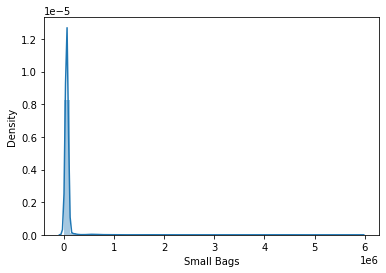

In [175]:
sns.distplot(data['Small Bags'])

In [250]:
data['Small Bags'].describe()

count    1.646800e+04
mean     7.954630e+04
std      2.037181e+05
min      3.311770e+03
25%      6.237569e+04
50%      6.237569e+04
75%      6.237569e+04
max      5.893642e+06
Name: Small Bags, dtype: float64

As per above observation, Small Bags column is not normally distributed

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

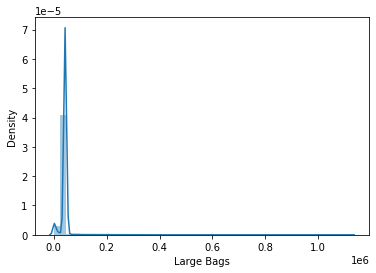

In [176]:
sns.distplot(data['Large Bags'])

In [249]:
data['Large Bags'].describe()

count    1.646800e+04
mean     4.264205e+04
std      3.586885e+04
min      0.000000e+00
25%      4.264205e+04
50%      4.264205e+04
75%      4.264205e+04
max      1.121076e+06
Name: Large Bags, dtype: float64

As per above observation, Large Bags column is  normally distributed

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

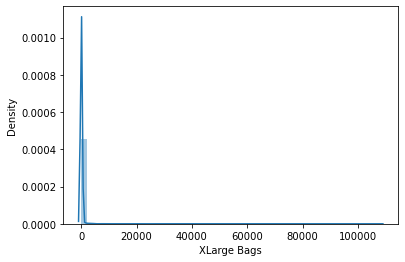

In [177]:
sns.distplot(data['XLarge Bags'])

In [248]:
data['XLarge Bags'].describe()

count     16468.000000
mean        200.980491
std        2348.549525
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      108072.790000
Name: XLarge Bags, dtype: float64

As per above observation, XLarge Bags column is not normally distributed

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

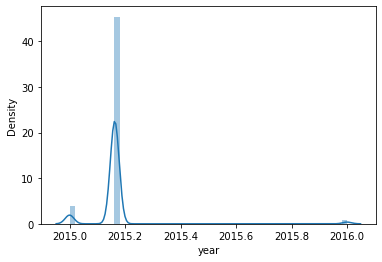

In [178]:
sns.distplot(data['year'])

In [247]:
data['year'].describe()

count    16468.000000
mean      2015.162821
std          0.112060
min       2015.000000
25%       2015.162821
50%       2015.162821
75%       2015.162821
max       2016.000000
Name: year, dtype: float64

As per above observation, year column is normally distributed

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Month', ylabel='Density'>

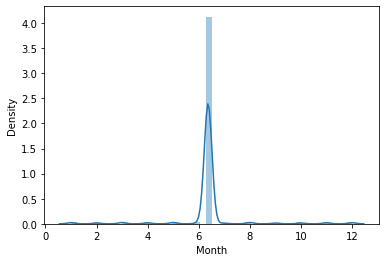

In [179]:
sns.distplot(data['Month'])

In [246]:
data['Month'].describe()

count    16468.000000
mean         6.362558
std          1.053514
min          1.000000
25%          6.362558
50%          6.362558
75%          6.362558
max         12.000000
Name: Month, dtype: float64

As per above observation, Month column is normally distributed

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day', ylabel='Density'>

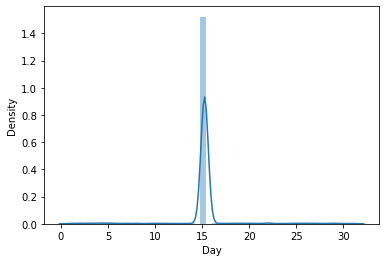

In [180]:
sns.distplot(data['Day'])

In [245]:
data['Day'].describe()

count    16468.000000
mean        15.253790
std          2.720422
min          1.000000
25%         15.253790
50%         15.253790
75%         15.253790
max         31.000000
Name: Day, dtype: float64

As per above observation, Day column is normally distributed.

In [181]:
data.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
Month           float64
Day             float64
dtype: object

# Segregating Numerical and categorical column

In [188]:
data_c = data.select_dtypes(include=['object'])

In [200]:
data_numerical = data.select_dtypes(exclude=['object'])

In [201]:
data_numerical.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,12.0,27.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,12.0,20.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,12.0,13.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,6.0,12.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,11.0,29.0


In [191]:
data_c.head()

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany


In [195]:
# Using one hot encodng, to covert categorical data  into numerical data
data_c_dummy = pd.get_dummies(data_c)

In [196]:
# checking first 5 rowss
data_c_dummy.head()

,type_conventional,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Outlier Removal

In [202]:
from scipy.stats import zscore
z=np.abs(zscore(data_numerical))
z.shape

(16468, 12)

In [193]:
print(np.where(z>3))

(array([   0,    0,    0, ..., 1515, 1516, 1516], dtype=int32), array([ 0, 10, 11, ..., 11,  0,  9], dtype=int32))


In [203]:
data_n_1 = data_n[(z<3).all(axis=1)]
print(data_numerical.shape)
print(data_n_1.shape)

(16468, 12)
(15151, 12)


Findings from the above observation, outliers has a large proportion of the data hence not removing outlier.

In [204]:
# Dropping Target column from data_numerical
data_numerical=data_numerical.drop('AveragePrice',axis=1)

In [205]:
sc =StandardScaler()
data_numerical_sc = sc.fit_transform(data_numerical)

In [209]:
data_numerical_sc_1 = pd.DataFrame(data_numerical_sc,index=data_numerical.index,columns=data_numerical.columns)

In [210]:
data_numerical_sc_1.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,-0.323254,-0.216503,-0.207897,-0.265536,-0.358416,-0.348250,-1.186269,-0.085579,-1.453029,5.351246,4.317920
1,-0.329993,-0.217094,-0.226516,-0.265303,-0.355026,-0.344301,-1.186150,-0.085579,-1.453029,5.351246,1.744712
2,-0.284390,-0.216898,-0.104151,-0.263647,-0.360727,-0.351006,-1.185993,-0.085579,-1.453029,5.351246,-0.828496
3,-0.312632,-0.216348,-0.174661,-0.264976,-0.370511,-0.362615,-1.185139,-0.085579,-1.453029,-0.344152,-1.196097
4,-0.332755,-0.216658,-0.228034,-0.264902,-0.368948,-0.361098,-1.183357,-0.085579,-1.453029,4.402013,5.053122


#  Final dataset

In [212]:
Final_dataset=pd.concat([data_c_dummy,data_numerical_sc_1],axis=1)

# Dividing dataset into features and columns where x=features y= columns

In [220]:
x=Final_dataset
y=data['AveragePrice']

In [221]:
x

,type_conventional,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,...,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1,1,0,0,0,0,0,0,0,0,...,-0.216503,-0.207897,-0.265536,-0.358416,-0.348250,-1.186269e+00,-0.085579,-1.453029e+00,5.351246e+00,4.317920e+00
1,1,1,0,0,0,0,0,0,0,0,...,-0.217094,-0.226516,-0.265303,-0.355026,-0.344301,-1.186150e+00,-0.085579,-1.453029e+00,5.351246e+00,1.744712e+00
2,1,1,0,0,0,0,0,0,0,0,...,-0.216898,-0.104151,-0.263647,-0.360727,-0.351006,-1.185993e+00,-0.085579,-1.453029e+00,5.351246e+00,-8.284959e-01
3,1,1,0,0,0,0,0,0,0,0,...,-0.216348,-0.174661,-0.264976,-0.370511,-0.362615,-1.185139e+00,-0.085579,-1.453029e+00,-3.441517e-01,-1.196097e+00
4,1,1,0,0,0,0,0,0,0,0,...,-0.216658,-0.228034,-0.264902,-0.368948,-0.361098,-1.183357e+00,-0.085579,-1.453029e+00,4.402013e+00,5.053122e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,1,0,0,0,0,0,0,1,0,0,...,-0.084848,-0.086102,-0.090271,-0.084795,-0.084289,-2.028551e-16,-0.085579,4.058196e-12,-1.686176e-15,-1.305982e-15
16464,1,0,0,0,0,0,0,1,0,0,...,-0.084848,-0.086102,-0.090271,-0.084795,-0.084289,-2.028551e-16,-0.085579,4.058196e-12,-1.686176e-15,-1.305982e-15
16465,1,0,0,0,0,0,0,1,0,0,...,-0.084848,-0.086102,-0.090271,-0.084795,-0.084289,-2.028551e-16,-0.085579,4.058196e-12,-1.686176e-15,-1.305982e-15
16466,1,0,0,0,0,0,0,1,0,0,...,-0.084848,-0.086102,-0.090271,-0.084795,-0.084289,-2.028551e-16,-0.085579,4.058196e-12,-1.686176e-15,-1.305982e-15


# To get best random score

In [222]:
from sklearn.linear_model import LinearRegression

maxAccu = 0
maxRS =0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(pred,y_test)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Getting best r2_score",maxAccu,"on best random_state",maxRS)        

Getting best r2_score 0.6450439384070719 on best random_state 78


# Model Fitting

# Linear Regression

In [223]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pd = lr.predict(x_test)
r2_score(y_test,lr_pd)

0.6640680091716289

# Decision Tree Regressor

In [224]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pd = dt.predict(x_test)
r2_score(y_test,dt_pd)

0.7082114086597522

# Random Forest Regressor

In [225]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pd = rf.predict(x_test)
r2_score(y_test,rf_pd)

0.8105241099237726

# Regularization technique

In [231]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet,SGDRegressor

# Ridge

In [227]:
rd = Ridge()
rd.fit(x_train,y_train)
rd_pd = rd.predict(x_test)
r2_score(y_test,rd_pd)

0.6628424389577205

# Cross_Validate

In [234]:
print(cross_val_score(lr,x,y,cv=5).mean())

-4.224809488317663e+22


In [237]:
print(cross_val_score(dt,x,y,cv=5).mean())

-165894.0


In [238]:
print(cross_val_score(rf,x,y,cv=5).mean())

-82811.2


In [239]:
print(cross_val_score(rd,x,y,cv=5).mean())

-2.524137082895712e+21


Findings from above observations,Linear regression is doing good in comparion to other model because diffrence between r2_score and cv score is lesser comparion to other model. 

# Hyperparameter Tuning

In [240]:
parameter = {'fit_intercept':[True,False],
             'normalize':[True,False],
             'positive':[True,False],
             'n_jobs':['None',-1]}

In [241]:
gsc = GridSearchCV(estimator=lr,param_grid=parameter,cv=5)

In [242]:
gsc.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = m

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': ['None', -1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [243]:
gsc.best_params_

{'fit_intercept': True,
 'n_jobs': 'None',
 'normalize': False,
 'positive': False}

In [244]:
Final_regression_model = LinearRegression(fit_intercept=True,n_jobs='None',normalize=False,positive=False)
Final_regression_model.fit(x_train,y_train)
prd = Final_regression_model.predict(x_test)
r2_score(prd,y_test)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


0.5435865695487883

# save model

In [276]:
import joblib
joblib.dump(Final_regression_model,"Avocado_Avg_price_prediction")

['Avocado_Avg_price_prediction']

# Now i am using Classification approach

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
avocado = pd.read_csv(r"C:\Users\acer\Desktop\Evaluation project\avocado.csv")

In [4]:
# checking first 5 rows
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
# dropping useless column
avocado = avocado.drop(["Unnamed: 0","type","Date"],axis=1)

In [6]:
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filling  missing value

In [7]:
avocado['AveragePrice']=avocado['AveragePrice'].fillna(avocado['AveragePrice'].mean())

In [8]:
avocado['Total Volume']=avocado['Total Volume'].fillna(avocado['Total Volume'].median())

In [9]:
avocado['4046']=avocado['4046'].fillna(avocado['4046'].median())

In [10]:
avocado['4225']=avocado['4225'].fillna(avocado['4225'].median())

In [11]:
avocado['4770']=avocado['4770'].fillna(avocado['4770'].median())

In [12]:
avocado['Total Bags']=avocado['Total Bags'].fillna(avocado['Total Bags'].median())

In [13]:
avocado['Small Bags']=avocado['Small Bags'].fillna(avocado['Small Bags'].median())

In [14]:
avocado['Large Bags']=avocado['Large Bags'].fillna(avocado['Large Bags'].mean())

In [15]:
avocado['XLarge Bags']=avocado['XLarge Bags'].fillna(avocado['XLarge Bags'].median())

In [16]:
avocado['year']=avocado['year'].fillna(avocado['year'].mean())

In [17]:
avocado['region'].mode()

0    California
dtype: object

In [18]:
avocado['region']=avocado['region'].fillna('California')

In [19]:
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33000,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.250000,0.0,2015.000000,Albany
1,1.35000,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.490000,0.0,2015.000000,Albany
2,0.93000,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.140000,0.0,2015.000000,Albany
3,1.08000,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.760000,0.0,2015.000000,Albany
4,1.28000,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.690000,0.0,2015.000000,Albany
...,...,...,...,...,...,...,...,...,...,...,...
16463,1.07499,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,42642.049374,0.0,2015.162821,California
16464,1.07499,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,42642.049374,0.0,2015.162821,California
16465,1.07499,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,42642.049374,0.0,2015.162821,California
16466,1.07499,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,42642.049374,0.0,2015.162821,California


In [20]:
avocado.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
region           object
dtype: object

In [21]:
le = LabelEncoder()

In [22]:
for i in avocado.columns:
    if avocado[i].dtypes=='object':
        avocado[i]=le.fit_transform(avocado[i])

In [23]:
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33000,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.250000,0.0,2015.000000,0
1,1.35000,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.490000,0.0,2015.000000,0
2,0.93000,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.140000,0.0,2015.000000,0
3,1.08000,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.760000,0.0,2015.000000,0
4,1.28000,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.690000,0.0,2015.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
16463,1.07499,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,42642.049374,0.0,2015.162821,6
16464,1.07499,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,42642.049374,0.0,2015.162821,6
16465,1.07499,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,42642.049374,0.0,2015.162821,6
16466,1.07499,402791.86,81751.17,118664.89,7688.17,73979.06,62375.69,42642.049374,0.0,2015.162821,6


# Dividing avocado dataset into features and columns where x=features y= columns

In [24]:
x = avocado.drop('region',axis=1)

In [25]:
y = avocado['region']

# to get best random_state 

In [60]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    pre=mod.predict(x_test)
    acc=accuracy_score(pre,y_test)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Getting best accuracy_score",maxAccu,"on best random_state",maxRS)        

Getting best accuracy_score 0.9335154826958105 on best random_state 43


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

# Normalize our data

In [27]:
mm =MinMaxScaler()

In [28]:
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
Lr_pd = Lr.predict(x_test)
print(classification_report(Lr_pd,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      0.92      0.96      3290
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

# decision tree classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()
Dt.fit(x_train,y_train)
Dt_pd = Dt.predict(x_test)
print(classification_report(y_test,Dt_pd))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       0.86      1.00      0.92         6
           2       0.88      1.00      0.93        14
           3       1.00      1.00      1.00        12
           4       0.92      0.92      0.92        12
           5       1.00      0.69      0.82        13
           6       1.00      1.00      1.00      3039
           7       0.88      0.88      0.88         8
           8       1.00      1.00      1.00         4
           9       1.00      0.88      0.93         8
          10       0.33      0.50      0.40         2
          11       1.00      1.00      1.00         5
          12       0.80      1.00      0.89         4
          13       0.80      1.00      0.89         4
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         5
          16       0.67      1.00      0.80         2
          17       0.75    

# random forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
Rf.fit(x_train,y_train)
Rf_pd = Rf.predict(x_test)
print(classification_report(y_test,Rf_pd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00      3039
           7       1.00      0.88      0.93         8
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         2
          17       1.00    

# support vector machine

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pd = svc.predict(x_test)
print(classification_report(y_test,svc_pd))

              precision    recall  f1-score   support

           0       0.16      0.44      0.23        16
           1       0.00      0.00      0.00         6
           2       0.36      0.29      0.32        14
           3       0.60      0.25      0.35        12
           4       0.12      0.17      0.14        12
           5       0.44      0.62      0.52        13
           6       1.00      1.00      1.00      3039
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         4
           9       0.11      0.88      0.20         8
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         5
          12       1.00      0.75      0.86         4
          13       0.00      0.00      0.00         4
          14       1.00      1.00      1.00         3
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         2
          17       0.29    

# Cross_Validation

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
print(cross_val_score(Lr,x,y,cv=5).mean())

0.9251282042772189


In [36]:
print(cross_val_score(Dt,x,y,cv=5).mean())

0.9774114693068461


In [37]:
print(cross_val_score(Rf,x,y,cv=5).mean())

0.9886452671127566


In [38]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.9346009299039324


In [39]:
          # ac          cv                 dif
# Lr        92         92.51             -0.51
# Dt        99         97.74              1.26
# Rf        100        98.86              1.14
# svc       95         93.46              1.54


Finding from above observation, Logistic Regression is performing good in comparison to other models because difference between accuracy score and cross_val_score is lesser in comparison to  other models

# Hyperparameter Tuning

In [50]:
# Final model building
Final_classification_model=LogisticRegression(penalty='l2',solver='newton-cg',random_state=43,C=100,multi_class='ovr')
Final_classification_model.fit(x_train,y_train)
model_pd = Final_classification_model.predict(x_test)
print(classification_report(y_test,model_pd))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00         6
           2       0.17      0.14      0.15        14
           3       1.00      0.08      0.15        12
           4       0.43      0.50      0.46        12
           5       0.00      0.00      0.00        13
           6       0.94      1.00      0.97      3039
           7       0.00      0.00      0.00         8
           8       1.00      1.00      1.00         4
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         5
          12       1.00      0.50      0.67         4
          13       0.00      0.00      0.00         4
          14       1.00      0.33      0.50         3
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         2
          17       0.00    

In [55]:
# save model
import joblib
joblib.dump(Final_classification_model,"Avocado_prediction_Region_wise")

['Avocado_prediction_Region_wise']

# checking how my model is performing

In [59]:
# conclusion
a = np.array(y_test)
predicted = np.array(Lr.predict(x_test))
df_com = pd.DataFrame({'Original':a,'predicted':predicted},index=range(len(a)))
df_com.head(50)

,Original,predicted
0,6,6
1,6,6
2,6,6
3,6,6
4,6,6
5,39,6
6,6,6
7,6,6
8,6,6
9,6,6


As per above observation,my model is performing very good.